In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
!ls ../datasets_full/London
!echo "---- * ----"
!ls ../datasets_full/Rio
!echo "---- * ----"
!ls ../datasets_full/Vancouver


UK_inflation.csv                    london_taxpayer_income.csv
UK_international-visits.csv         london_ticket_sales.csv
london_earnings_by_borough.csv      london_tickets_for_sale.csv
london_economic_activity.csv        london_underground_activity.csv
london_infrastructure_spending.csv  london_underground_station_info.csv
london_sports_participation.csv
---- * ----
brazil_gdp.csv                    brazil_tourism_jobs.csv
brazil_international_arrivals.csv brazil_unemployment.csv
brazil_monthly_income.csv
---- * ----
region_codes.csv
vancouver_business_size.csv
vancouver_employment_by_industry.csv
vancouver_employment_by_industry_legend.csv
vancouver_room_revenues_2000_2010.csv
vancouver_room_revenues_2010_2019.csv
vancouver_small_business_by_region.csv
vancouver_turism_indicators.csv
vancouver_visits.csv


# London

In [59]:
london_root = "../datasets_full/London/"
inflation = pd.read_csv(london_root + "UK_inflation.csv") 
# inflation.head()

In [84]:
""" 
2002 - 2019
golds:
1) 计算consumption
risks:
1) sample感觉有问题？为什么乘上1000后还是float？
"""
inter_visist = pd.read_csv(london_root+"UK_international-visits.csv")
inter_visist = inter_visist[inter_visist['year'] != '2019P']
inter_visist['year'] = inter_visist['year'].astype(int)
inter_visist = inter_visist[inter_visist.year < 2015] 
inter_visist.head()

/Users/adam/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,year,quarter,market,dur_stay,mode,purpose,area,visits,spend,nights,sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,TOTAL ENGLAND,4.431616,1.013484,9.530416,6
1,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
2,2002,January-March,Belgium,1-3 nights,Air,Holiday,REST OF ENGLAND,0.859430,0.044346,2.575960,1
3,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTHERN ENGLAND,0.859430,0.044346,2.575960,1
4,2002,January-March,Belgium,1-3 nights,Air,Holiday,SOUTH EAST,0.859430,0.044346,2.575960,1


In [85]:
# inter_visist = inter_visist[inter_visist['sample'] > 1]

In [86]:
inter_visist['quarter'].replace({'January-March': 1,
                                 'April-June': 4,
                                 'July-September': 7,
                                 'October-December': 10}, 
                                 inplace=True)

In [87]:
# holiday_visist = inter_visist[inter_visist.purpose == 'Holiday']

In [88]:
holiday_visist['dur_stay'].value_counts()

4-7 nights     33657
8-14 nights    29897
1-3 nights     26918
15+ nights     23768
Not Known        104
Name: dur_stay, dtype: int64

In [89]:
holiday_visist['market'].unique()

array(['Belgium', 'Luxembourg', 'France', 'Germany', 'Italy',
       'Netherlands', 'Denmark', 'Greece', 'Spain', 'Portugal', 'Austria',
       'Sweden', 'Finland', 'Irish Republic', 'Turkey', 'Switzerland',
       'Norway', 'Iceland', 'Czech Republic', 'Poland', 'Hungary',
       'Russia', 'Other Western Europe', 'Other Eastern Europe', 'USA',
       'Canada', 'Mexico', 'Brazil', 'Argentina',
       'Other Central & South America', 'Hong Kong', 'Malaysia',
       'Thailand', 'Singapore', 'Taiwan', 'China', 'Other Asia', 'Japan',
       'South Korea', 'Australia', 'New Zealand', 'United Arab Emirates',
       'Saudi Arabia', 'Kuwait', 'Other Middle East', 'Egypt', 'Israel',
       'India', 'Pakistan', 'South Africa', 'Other Southern Africa',
       'Nigeria', 'Kenya', 'Other Africa', 'Bulgaria', 'Romania',
       'Serbia', 'Chile', 'Indonesia', 'Bahrain', 'Oman', 'Qatar'],
      dtype=object)

In [90]:
inter_visist.area.unique()

array(['TOTAL ENGLAND', 'LONDON', 'REST OF ENGLAND', 'SOUTHERN ENGLAND',
       'SOUTH EAST', 'SCOTLAND', 'ALL STAYING VISITS',
       "ENGLAND'S NORTH COUNTRY", 'CENTRAL ENGLAND', 'NORTH EAST',
       'NORTH WEST', 'WEST MIDLANDS', 'EAST MIDLANDS', 'EAST OF ENGLAND',
       'SOUTH WEST', 'YORKSHIRE', 'WALES', ' NORTHERN IRELAND',
       ' OIL RIGS/TRAVELLING', ' ISLE OF MAN', ' CHANNEL ISLANDS'],
      dtype=object)

In [91]:
london_holiday_visist = holiday_visist[inter_visist.area == 'LONDON']
london_holiday_visist = london_holiday_visist.groupby(['year', 'quarter'])[['spend', 'visits']].sum()
london_holiday_visist = london_holiday_visist[london_holiday_visist.index.get_level_values(level='quarter') == 7]

/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [92]:
london_holiday_visist_d = london_holiday_visist.shift(1)
london_holiday_visist['spend_rate'] = london_holiday_visist['spend'] / london_holiday_visist_d['spend'] - 1
london_holiday_visist['visits_rate'] = london_holiday_visist['visits'] / london_holiday_visist_d['visits'] - 1 

In [93]:
index = list(map(lambda x: str(x), london_holiday_visist['visits_rate'].index.values))

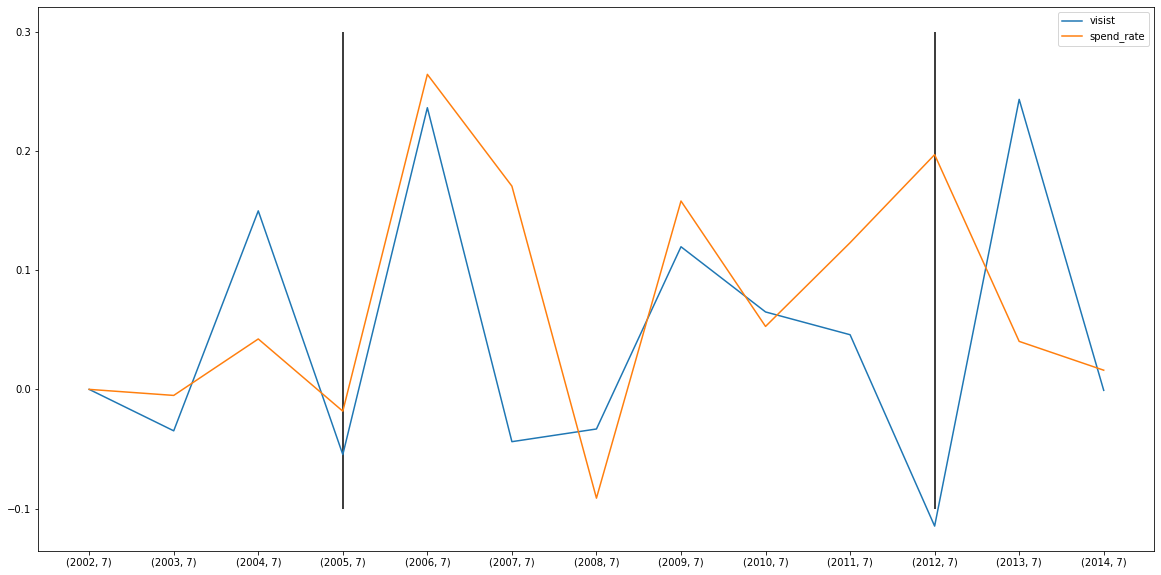

In [94]:
""" 以holiday为目的的增长率的plot
insight: 
"""
y = london_holiday_visist['visits_rate'].fillna(0).values
y2 = london_holiday_visist['spend_rate'].fillna(0).values
plt.figure(figsize=(20, 10))
plt.plot(index, y, label='visist')
plt.plot(index, y2, label='spend_rate')
plt.vlines("(2012, 7)", -0.1, 0.3)
plt.vlines("(2005, 7)", -0.1, 0.3)
plt.legend()

In [95]:
""" 以来的长短来区分 """
london_holiday_visist_dur_stay = holiday_visist[inter_visist.area == 'LONDON']
london_holiday_visist_dur_stay = london_holiday_visist_dur_stay.groupby(['year', 'quarter', "dur_stay"])[['spend', 'visits']].sum()
london_holiday_visist_dur_stay = london_holiday_visist_dur_stay.unstack(level='dur_stay')

/Users/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [96]:
london_holiday_visist_dur_stay_d = london_holiday_visist_dur_stay.shift(4)
london_holiday_visist_dur_stay = london_holiday_visist_dur_stay / london_holiday_visist_dur_stay_d - 1
london_holiday_visist_dur_stay = london_holiday_visist_dur_stay[london_holiday_visist_dur_stay.index.get_level_values(level='quarter') == 7]
index = list(map(lambda x: str(x), london_holiday_visist_dur_stay.index.values))

In [97]:
y1 = london_holiday_visist_dur_stay['spend']['1-3 nights']
y2 = london_holiday_visist_dur_stay['spend']['8-14 nights']
y3 = london_holiday_visist_dur_stay['spend']['15+ nights']
y4 = london_holiday_visist_dur_stay['spend']['4-7 nights']

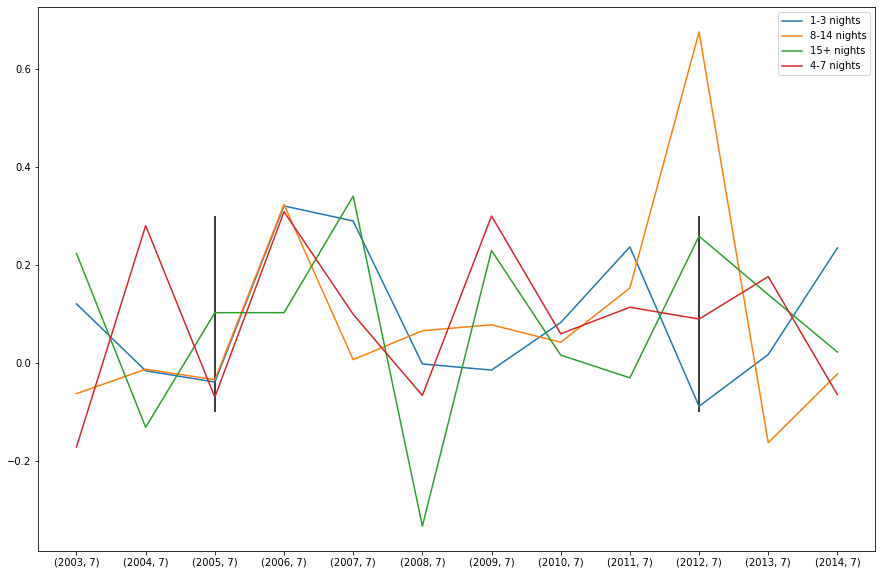

In [98]:
""" 以holiday，为来的时间来为目的的增长率的plot
insight: 奥运会后长期的旅游人数增加
"""
plt.figure(figsize=(15, 10))
plt.plot(index, y1, label='1-3 nights')
plt.plot(index, y2, label='8-14 nights')
plt.plot(index, y3, label='15+ nights')
plt.plot(index, y4, label='4-7 nights')
plt.vlines("(2012, 7)", -0.1, 0.3)
plt.vlines("(2005, 7)", -0.1, 0.3)
plt.legend()

In [99]:
holiday_visist_filter = holiday_visist[holiday_visist.area != 'TOTAL ENGLAND']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != ' CHANNEL ISLANDS']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != 'REST OF ENGLAND']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != ' ISLE OF MAN']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != ' OIL RIGS/TRAVELLING']
holiday_visist_filter = holiday_visist_filter[holiday_visist_filter.area != 'ALL STAYING VISITS']

In [100]:
holiday_visist_filter.area.unique()

array(['LONDON', 'SOUTHERN ENGLAND', 'SOUTH EAST', 'SCOTLAND',
       'CENTRAL ENGLAND', 'WEST MIDLANDS', 'SOUTH WEST', 'EAST MIDLANDS',
       'WALES', 'EAST OF ENGLAND', "ENGLAND'S NORTH COUNTRY",
       'NORTH EAST', 'YORKSHIRE', ' NORTHERN IRELAND', 'NORTH WEST'],
      dtype=object)

In [101]:
""" 分地区是否存在substitution effect 
south east 和 east of england 是和london临近的
"""
all_holiday_visist = holiday_visist_filter.groupby(['year', 'quarter', 'area'])[['spend', 'visits']].sum()
all_holiday_visist = all_holiday_visist.unstack(level='area')

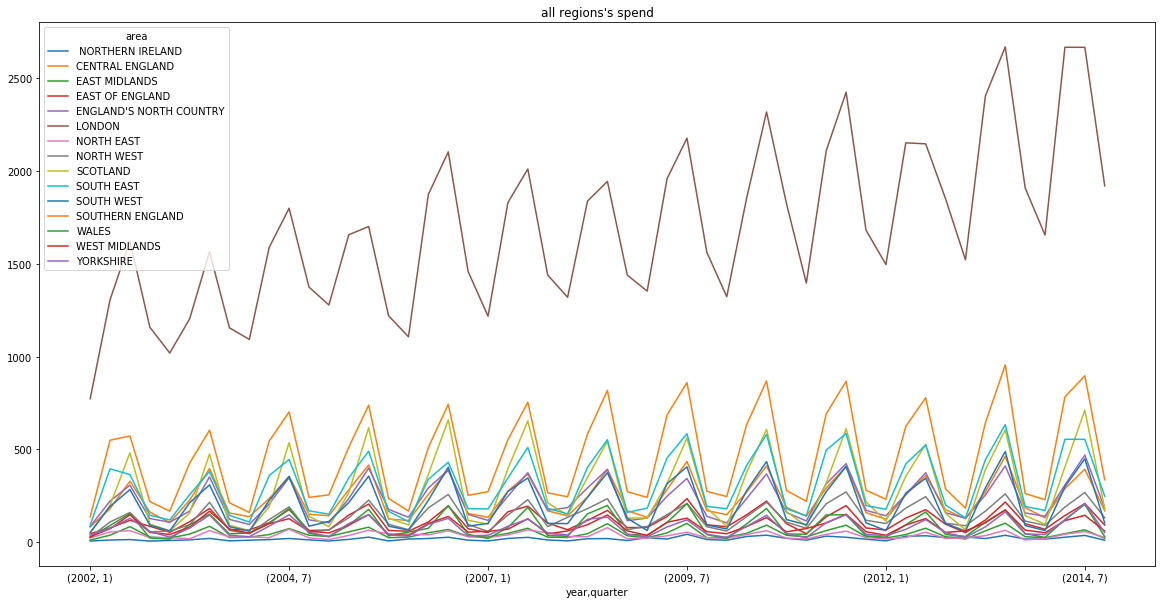

In [49]:
all_holiday_visist['visits'].plot(figsize=(20, 10), title="all regions's spend")

In [50]:
cols = ['LONDON', 'SOUTH EAST', 'EAST OF ENGLAND', 'EAST MIDLANDS', 'WEST MIDLANDS', 'SOUTH WEST']
all_holiday_visist.loc[:, ('visits', 'REST')] = 0
for col in cols:
    all_holiday_visist.loc[:, ('visits', 'REST')] = all_holiday_visist.loc[:, ('visits', 'REST')] + all_holiday_visist['spend'][col]

In [51]:
# y_list = []
# for col in cols:
#     y_list.append(all_holiday_visist['spend'][col].values)
    
# index = list(map(lambda x: str(x), all_holiday_visist.index.values))
# plt.figure(figsize=(15, 10))
# for i, col in enumerate(cols):
#     plt.plot(index, y_list[i], label=col)
# plt.vlines("(2012, 7)", 0, 1000)
# plt.vlines("(2005, 7)", 0, 1000)
# plt.legend()
# plt.title("regional spend")
# plt.show()

<Figure size 1080x720 with 0 Axes>

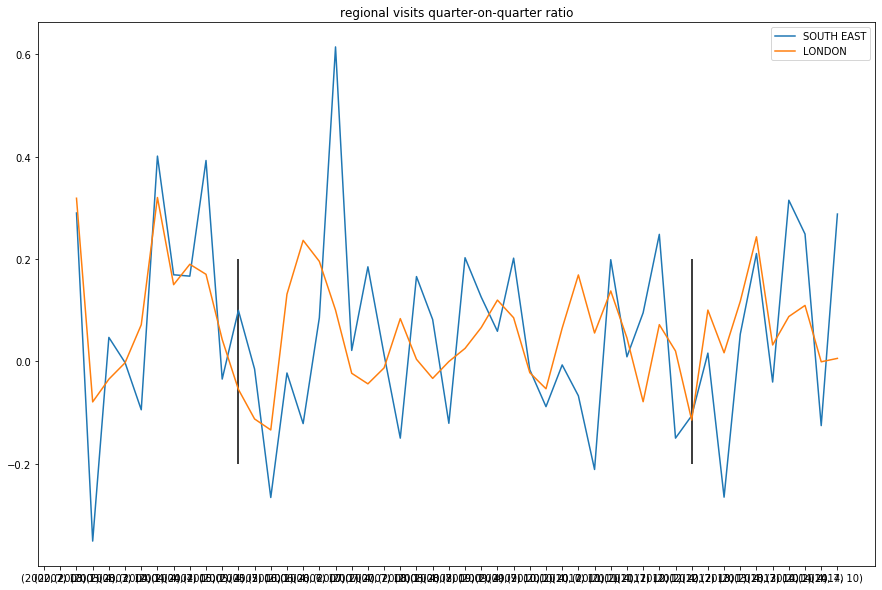

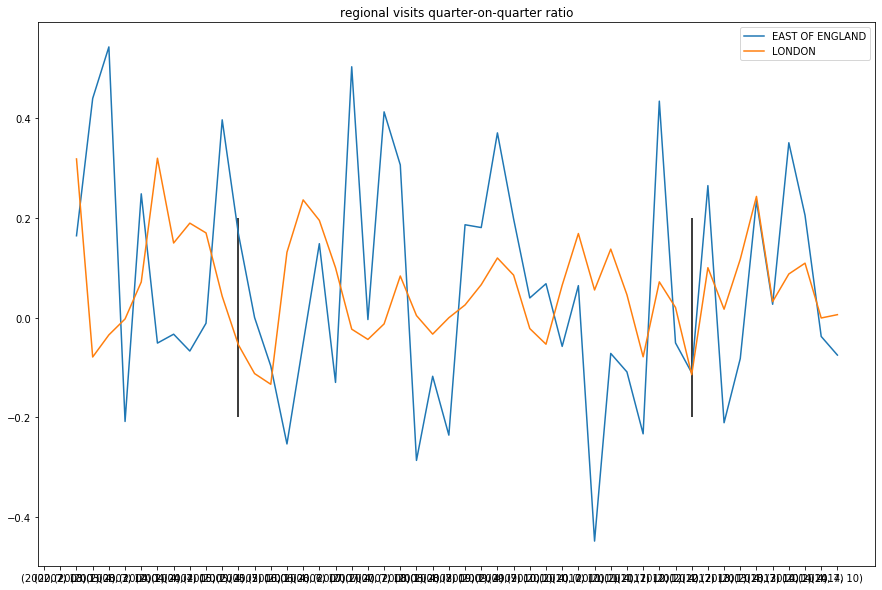

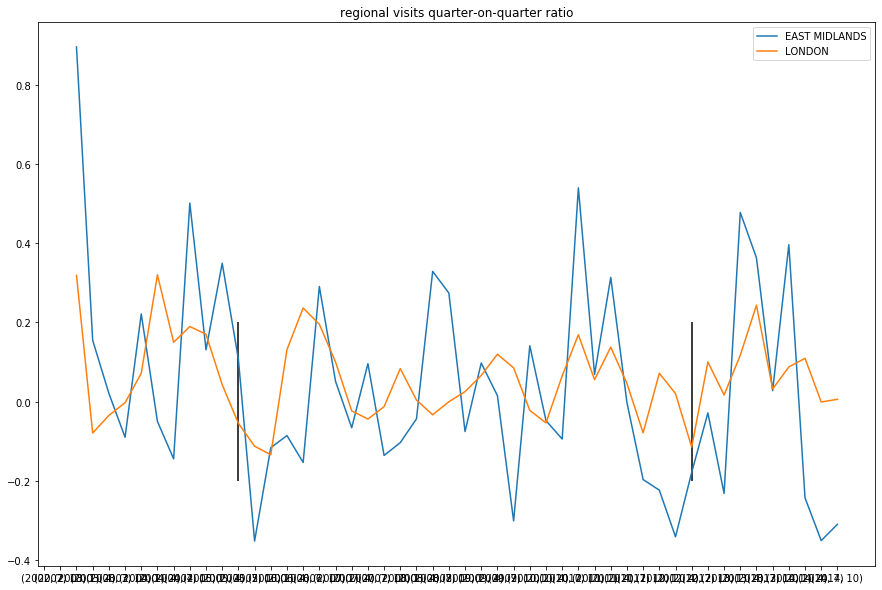

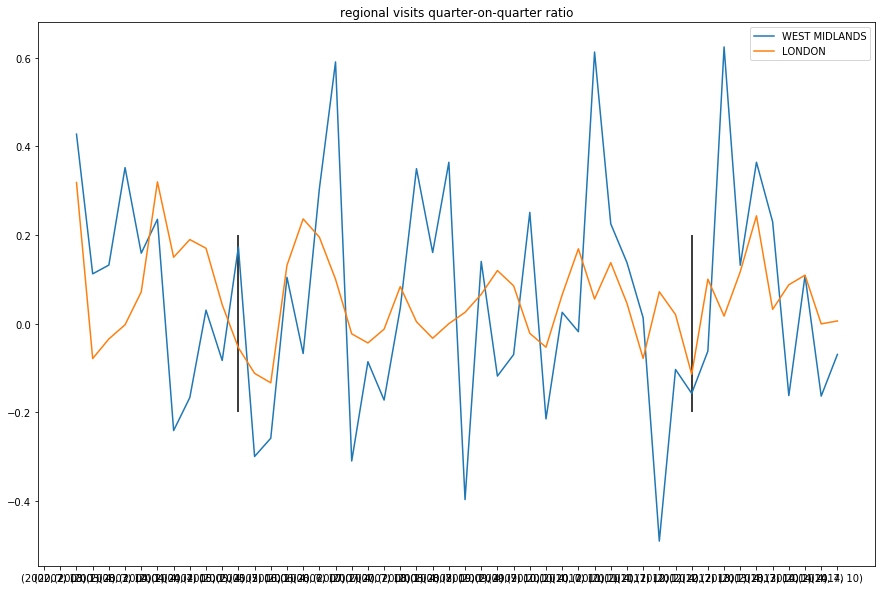

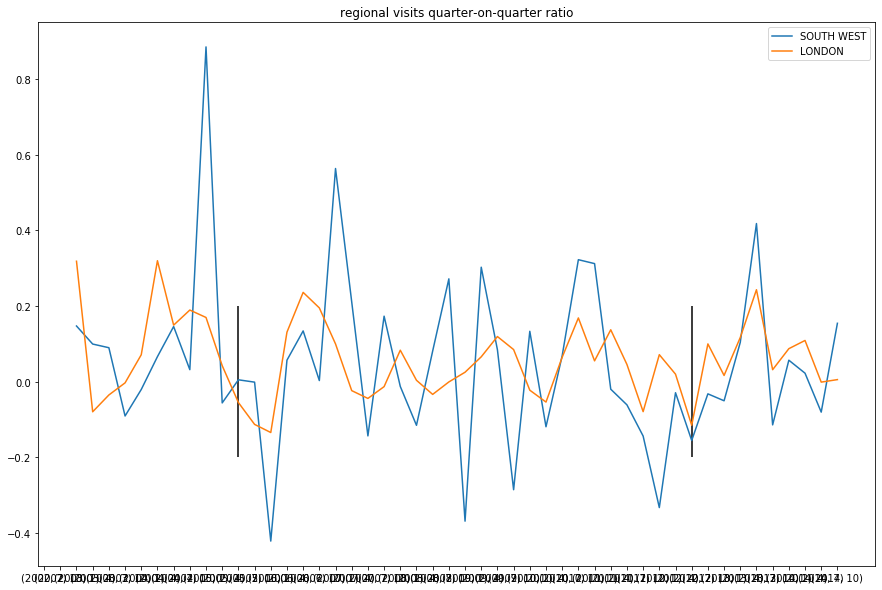

In [52]:
""" 
insight: 
"""
all_holiday_visist_d = all_holiday_visist.shift(4)
all_holiday_visist_r = all_holiday_visist / all_holiday_visist_d - 1
y_list = []
for col in cols:
    y_list.append(all_holiday_visist_r['visits'][col].values)
    
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    if col == 'LONDON': continue
    plt.figure(figsize=(15, 10))
    plt.plot(index, y_list[i], label=col)
    plt.plot(index, all_holiday_visist_r['visits']['LONDON'].values, label='LONDON')
    plt.vlines("(2012, 7)", -0.2, 0.2)
    plt.vlines("(2005, 7)", -0.2, 0.2)
    plt.legend()
    plt.title("regional visits quarter-on-quarter ratio")
    plt.show()

In [53]:
july_all_holiday_visist = all_holiday_visist[all_holiday_visist.index.get_level_values(level='quarter') == 7]

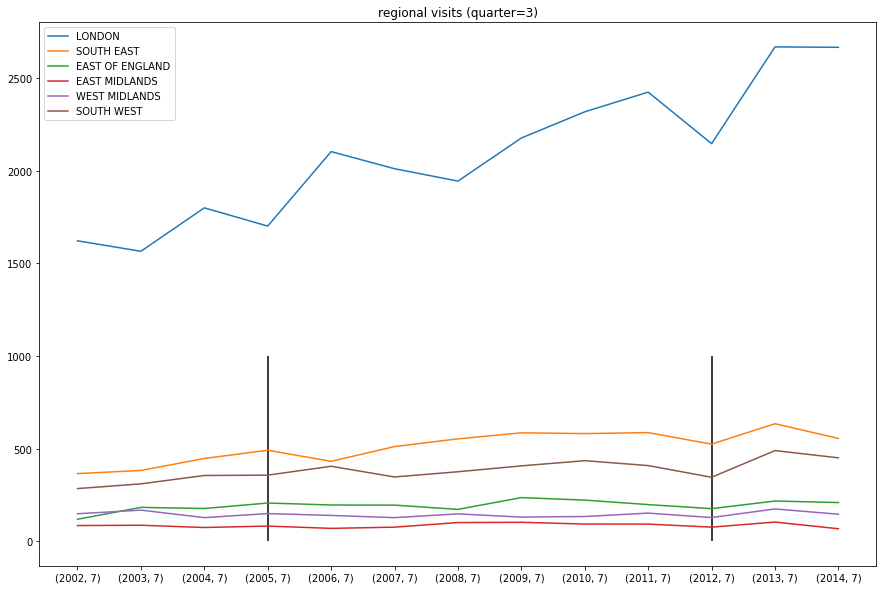

In [54]:
y_list = []
for col in cols:
    y_list.append(july_all_holiday_visist['visits'][col].values)
    
index = list(map(lambda x: str(x), july_all_holiday_visist.index.values))
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    plt.plot(index, y_list[i], label=col)
plt.vlines("(2012, 7)", 0, 1000)
plt.vlines("(2005, 7)", 0, 1000)
plt.legend()
plt.title("regional visits (quarter=3)")
plt.show()

<Figure size 1080x720 with 0 Axes>

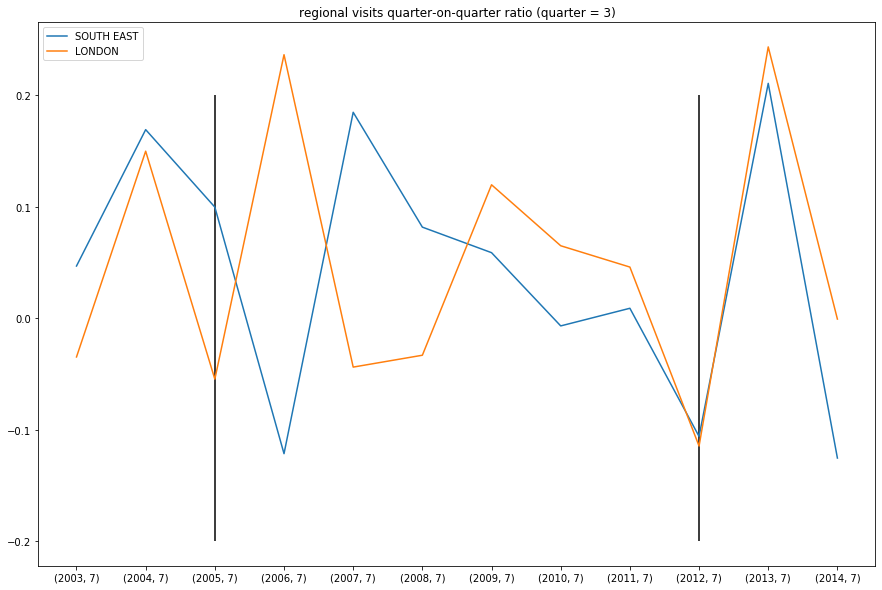

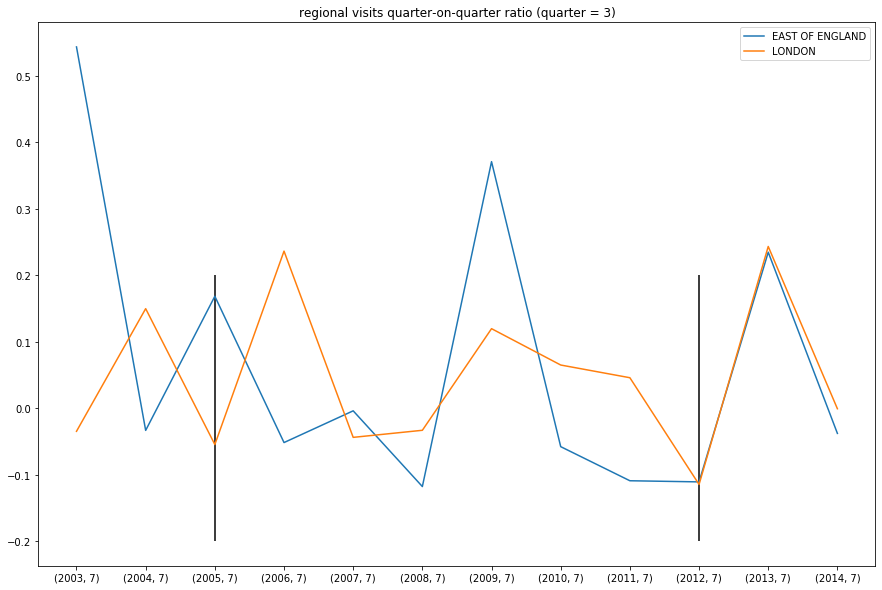

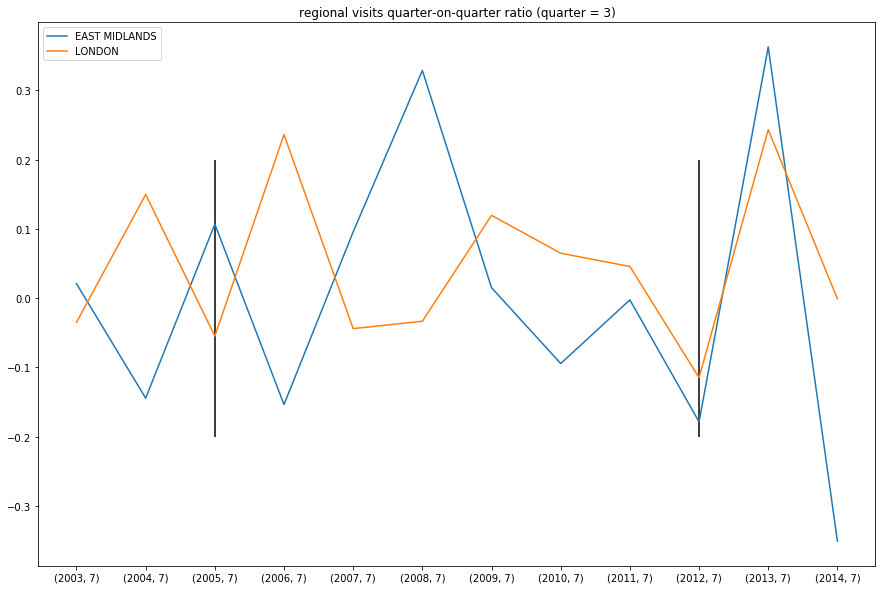

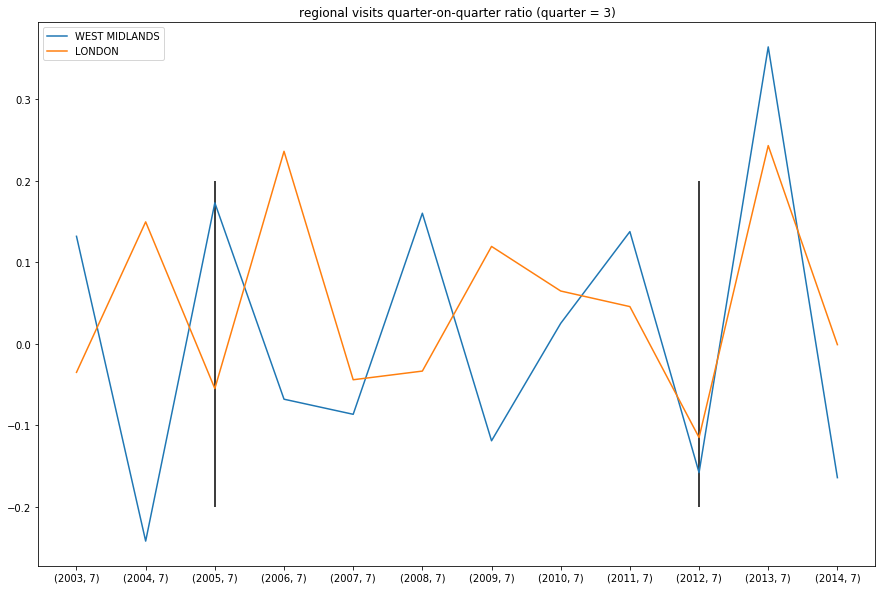

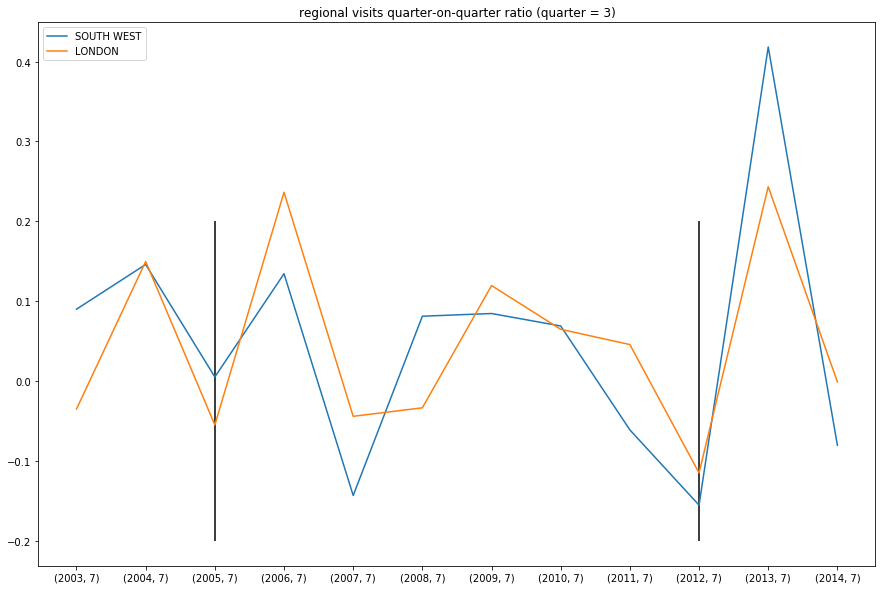

In [55]:
""" 只有第三季度的增速的变化

"""
july_all_holiday_visist_d = july_all_holiday_visist.shift(1)
july_all_holiday_visist_r = july_all_holiday_visist / july_all_holiday_visist_d - 1
y_list = []
for col in cols:
    y_list.append(july_all_holiday_visist_r['visits'][col].values)
    
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    if col == 'LONDON': continue
    plt.figure(figsize=(15, 10))
    plt.plot(index, y_list[i], label=col)
    plt.plot(index, july_all_holiday_visist_r['visits']['LONDON'].values, label='LONDON')
    plt.vlines("(2012, 7)", -0.2, 0.2)
    plt.vlines("(2005, 7)", -0.2, 0.2)
    plt.legend()
    plt.title("regional visits quarter-on-quarter ratio (quarter = 3)")
    plt.show()

In [56]:
"""分待得时间的图"""
all_holiday_visist_by_day = holiday_visist_filter.groupby(['year', 'quarter', 'area', 'dur_stay'])[['spend', 'visits']].sum()
all_holiday_visist_by_day = all_holiday_visist_by_day.unstack(level='area').unstack(level='dur_stay')
july_all_holiday_visist_by_day = all_holiday_visist_by_day[all_holiday_visist_by_day.index.get_level_values(level='quarter') == 7]

In [57]:
# sub_cols = ['1-3 nights', '15+ nights', '4-7 nights', '8-14 nights']
sub_cols = ['15+ nights', '8-14 nights', '1-7 nights']
for col in cols:
    july_all_holiday_visist_by_day.loc[:, ('visits', col, '1-7 nights')] =\
    july_all_holiday_visist_by_day.loc[:, ('visits', col)]['1-3 nights'] +\
    july_all_holiday_visist_by_day.loc[:, ('visits', col)]['4-7 nights']

/Users/adam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/adam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/Users/adam/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1762: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._get

<Figure size 1080x720 with 0 Axes>

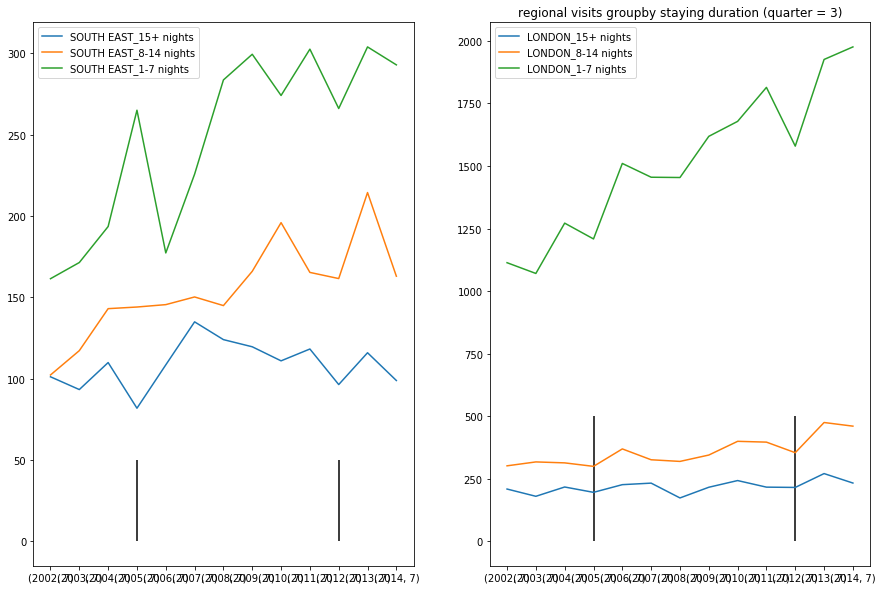

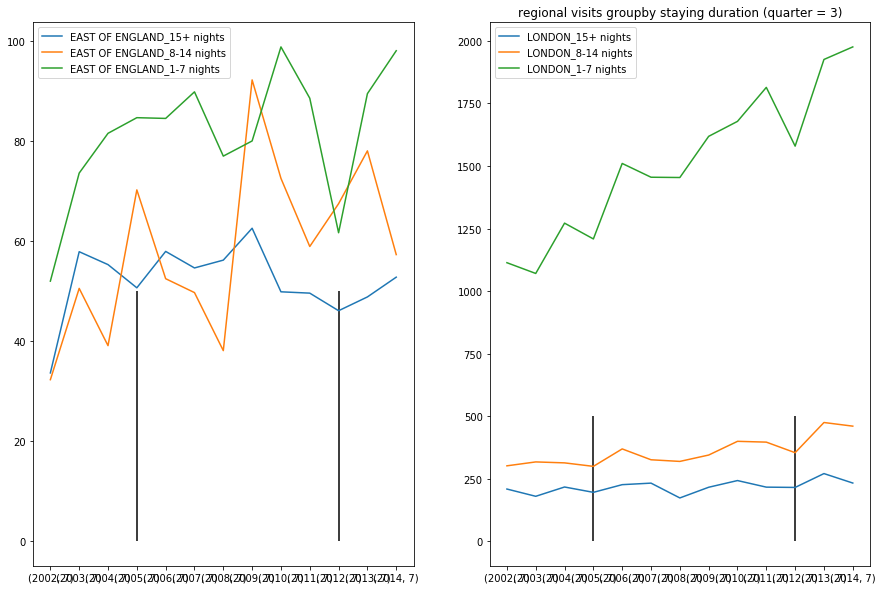

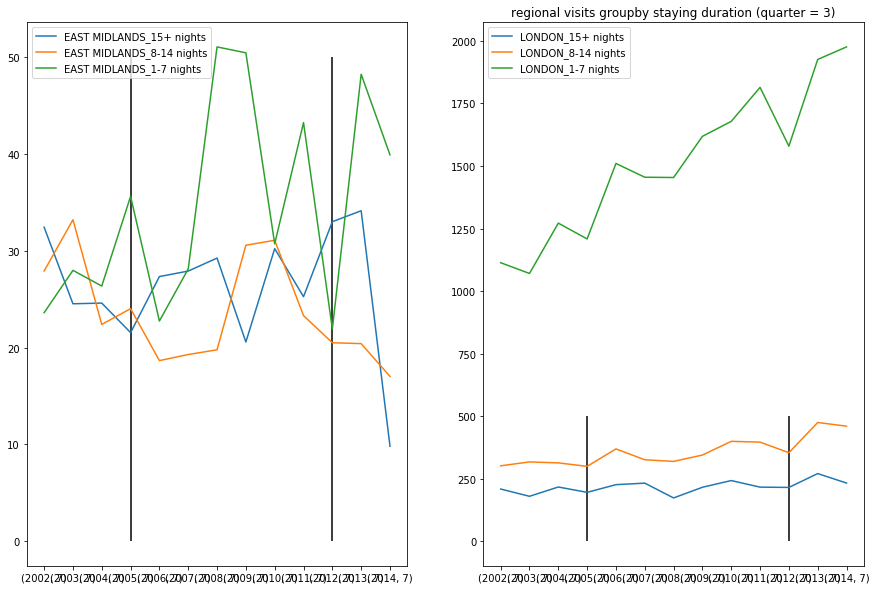

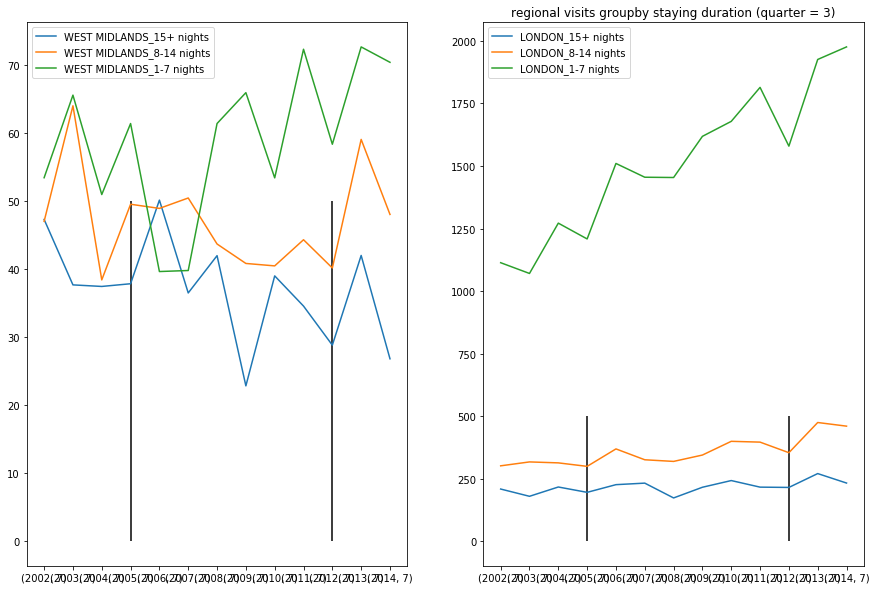

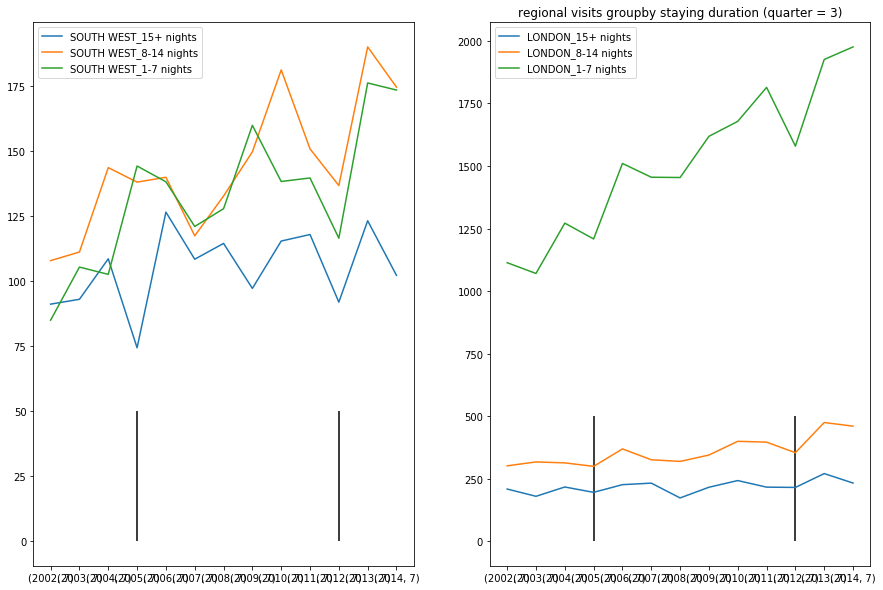

In [58]:
y_list = []
for col in cols:
    y_list.append(july_all_holiday_visist_by_day['visits'][col])
index = list(map(lambda x: str(x), july_all_holiday_visist_by_day.index.values))
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols):
    if col == 'LONDON': continue
    f, axses = plt.subplots(1,2, figsize=(15, 10))
    for sub_col in sub_cols:
        axses[0].plot(index, y_list[i][sub_col], label=col+'_'+sub_col)
        axses[1].plot(index, july_all_holiday_visist_by_day['visits']['LONDON'][sub_col].values, label='LONDON'+'_'+sub_col)
    axses[0].vlines("(2012, 7)", 0, 50)
    axses[0].vlines("(2005, 7)", 0, 50)    
    axses[1].vlines("(2012, 7)", 0, 500)
    axses[1].vlines("(2005, 7)", 0, 500)
    axses[1].legend()
    axses[0].legend()
    plt.title("regional visits groupby staying duration (quarter = 3)")
    plt.show()